In [348]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [349]:
df = sns.load_dataset('iris')

In [350]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='petal_length', ylabel='petal_width'>

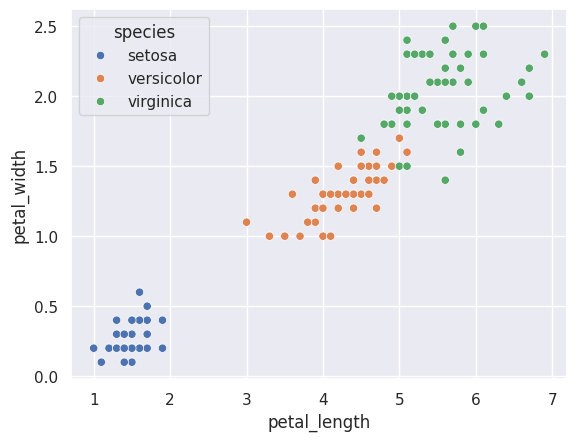

In [351]:
sns.scatterplot(data = df , x = 'petal_length' ,  y = 'petal_width' , hue = 'species')

In [352]:
# train test split
X = df.drop('species' , axis=1)
y = df['species']

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify= y
)

In [353]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train.values)
y_test = encoder.transform(y_test.values)

In [354]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 4)

X_train_trans = pca.fit_transform(X_train)
X_test_trans = pca.transform(X_test)

In [355]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_trans , y_train)

lr.score(X_test_trans, y_test)*100 

96.66666666666667

In [356]:
from sklearn.metrics import classification_report

print(classification_report(y_test , lr.predict(X_test_trans)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [357]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C' : [0.1 , 0.3 , 0.7 , 1],
    'penalty' : ['l1' , 'l2' , 'elasticnet' , None],
    'solver' : ['lbfgs' , 'liblinear' , 'newton-cg' , 'newton-cholesky' , 'sag' , 'saga'],
    
}

grid = GridSearchCV(LogisticRegression() , param_grid= param_grid)
grid.fit(X_train_trans , y_train)
grid.score(X_test_trans , y_test)

/home/kasim/Projects/Machine-Learning-Projects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/kasim/Projects/Machine-Learning-Projects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/kasim/Projects/Machine-Learning-Projects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multic

1.0

In [358]:
grid.best_estimator_

,penalty,None
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [359]:
grid.best_params_

{'C': 0.1, 'penalty': None, 'solver': 'lbfgs'}

In [360]:
par = grid.best_params_

In [361]:
lr = LogisticRegression(C=par['C'] , penalty= None  , solver= 'lbfgs')

In [362]:
lr.fit(X_train_trans , y_train)

/home/kasim/Projects/Machine-Learning-Projects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


,penalty,None
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [363]:
lr.score(X_test_trans , y_test)

1.0